In [430]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading training and testing Data

In [431]:
df = pd.read_csv('train.csv')
df1 = pd.read_csv('test.csv')
df=df.drop(['Name', 'Ticket'], axis=1)
df1=df1.drop(['Name', 'Ticket'], axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


In [432]:
df1.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,male,34.5,0,0,7.8292,NaN,Q
1,893,3,female,47.0,1,0,7.0000,NaN,S
2,894,2,male,62.0,0,0,9.6875,NaN,Q
3,895,3,male,27.0,0,0,8.6625,NaN,S
4,896,3,female,22.0,1,1,12.2875,NaN,S


In [433]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


#### Cabin column is having more than 77%missing value so we can skip this column

In [434]:
df = df.drop('Cabin', axis=1)
df1 = df1.drop('Cabin', axis=1)

### Exploratory Analysis

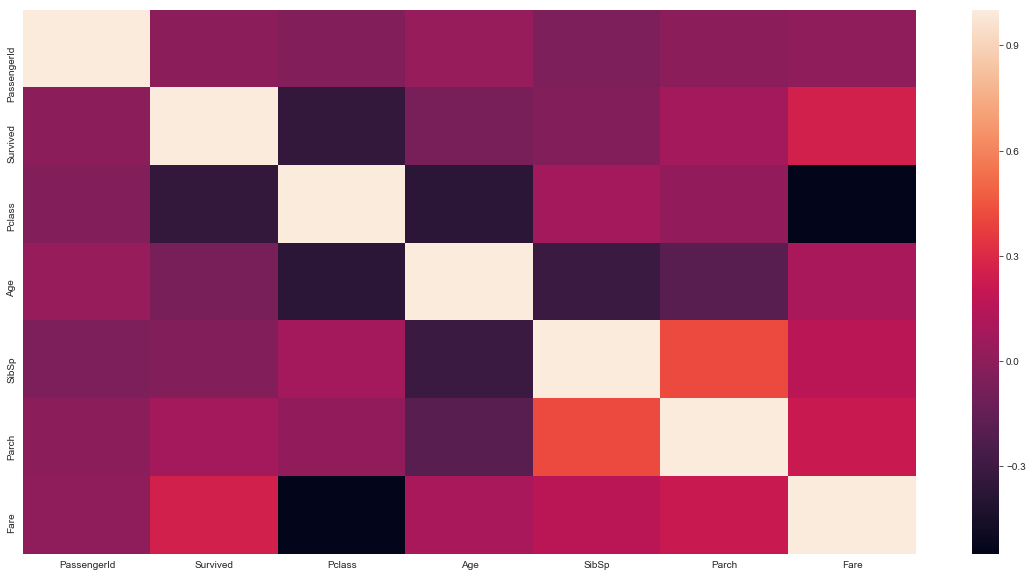

In [435]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr())

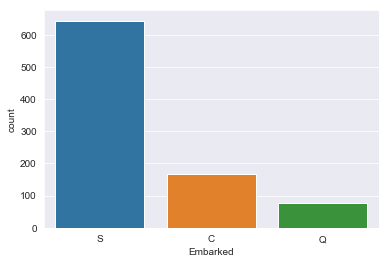

In [436]:
sns.countplot(df['Embarked'])

C:\Users\ADITYA\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\ADITYA\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\ADITYA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\ADITYA\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbi

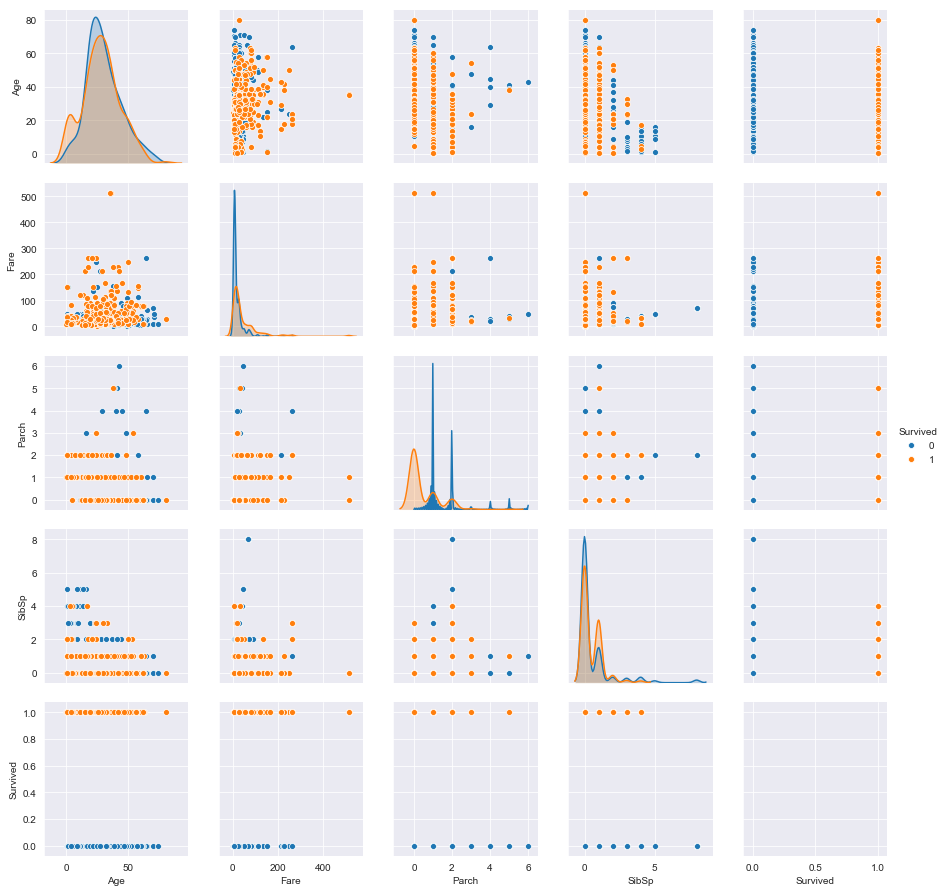

In [437]:
sns.pairplot(df[['Age', 'Fare', 'Parch', 'SibSp', 'Survived']], hue='Survived')

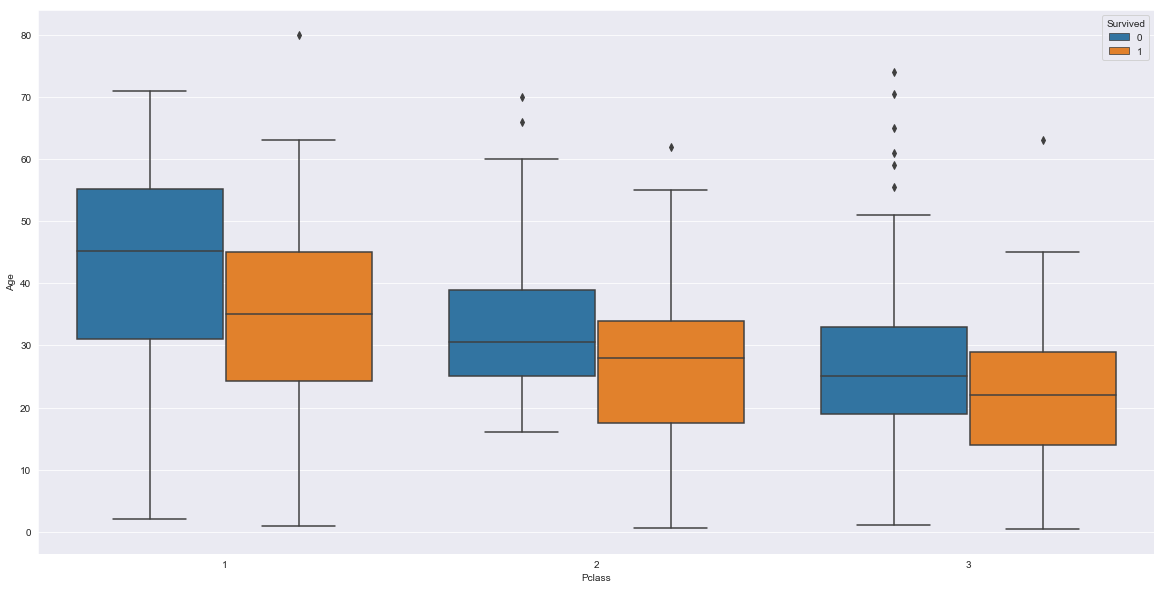

In [438]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid")
sns.boxplot(y='Age', x='Pclass', data=df, hue='Survived')

### Feature Enginering

#### Missing Values

- In embarked feature some values are missing we can fill nan value with 'S' as it is in majority

In [439]:
df['Embarked'].fillna('S', inplace=True)
df1['Embarked'].fillna('S', inplace=True)

- Age feature has some missing values
<br>
- So we plot a box plot with x= Pclass and y=Age considering hue=survived
<br>
- To deal with missing values we will will replace nan value with median of respective block
<br>
<br>
eg -> for class = 1 and survived = 0  nan value will be replace by median = 46

In [440]:
df['Age'].fillna('xxx', inplace=True)
for i in range(len(df)):
    if df.loc[i,'Age'] == 'xxx':
        if df.loc[i, 'Pclass'] == 1:
            df.loc[i, 'Age'] = 39.75
        elif df.loc[i, 'Pclass'] == 2:
            df.loc[i, 'Age'] = 30
        elif df.loc[i, 'Pclass'] == 3:
            df.loc[i, 'Age'] = 23.25
df.info()       

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null object
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(1), int64(5), object(3)
memory usage: 62.7+ KB


- for test we will replace nan value with average of what we done in for train data

In [441]:
df1['Age'].fillna('xxx', inplace=True)
for i in range(len(df1)):
    if df1.loc[i,'Age'] == 'xxx':
        if df1.loc[i, 'Pclass'] == 1:
            df1.loc[i, 'Age'] = 39.75
        elif df1.loc[i, 'Pclass'] == 2:
            df1.loc[i, 'Age'] = 30
        elif df1.loc[i, 'Pclass'] == 3:
            df1.loc[i, 'Age'] = 23.25
df1.info()      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            418 non-null object
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
Embarked       418 non-null object
dtypes: float64(1), int64(4), object(3)
memory usage: 26.2+ KB


- we can see one fare value is missing lets look at it for possible subsitution

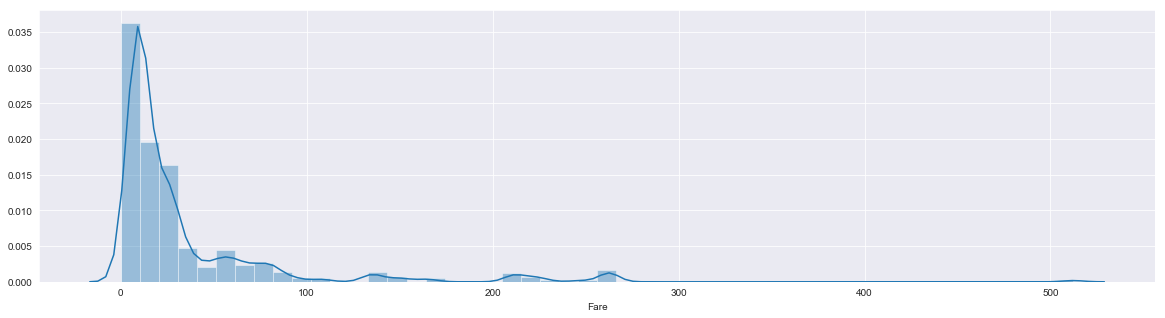

In [442]:
plt.figure(figsize=(20,5))
sns.distplot(df1['Fare'].dropna())

In [443]:
df1['Fare'].describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

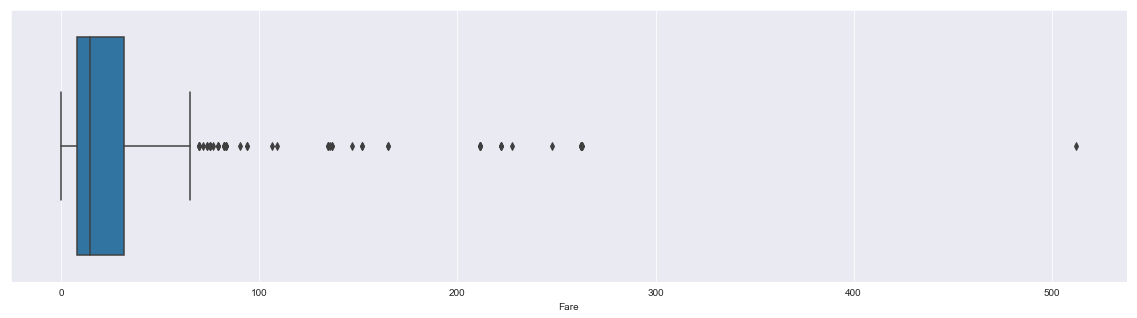

In [444]:
plt.figure(figsize=(20,5))
sns.boxplot(df1['Fare'])

- we can se too many outlier in box plot so we must replace nan value with median

In [445]:
df1.Fare.fillna(df1['Fare'].dropna().median(), inplace=True)

### Preprocessing and Prediction

##### train data processing

In [446]:
neww = df.copy()
sex=pd.get_dummies(neww['Sex'], drop_first=True)
clas=pd.get_dummies(neww['Pclass'], drop_first=True)
emb=pd.get_dummies(neww['Embarked'], drop_first=True)
neww=neww.drop(['Sex', 'Pclass', 'Embarked'], axis=1)
neww['Sex'] =sex
neww = neww.join(clas)
neww = neww.join(emb)

In [447]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(neww[['Age', 'Fare']])


C:\Users\ADITYA\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [448]:
noramalize_value=pd.DataFrame(scaler.transform(neww[['Age', 'Fare']]) , columns=['Age', 'Fare'])
neww.drop(['Age', 'Fare'], axis=1, inplace=True)
neww = neww.join(noramalize_value)
noramalize_value.head()

,Age,Fare
0,0.271174,0.014151
1,0.472229,0.139136
2,0.321438,0.015469
3,0.434531,0.103644
4,0.434531,0.015713


In [449]:
neww.head()

,PassengerId,Survived,SibSp,Parch,Sex,2,3,Q,S,Age,Fare
0,1,0,1,0,1,0,1,0,1,0.271174,0.014151
1,2,1,1,0,0,0,0,0,0,0.472229,0.139136
2,3,1,0,0,0,0,1,0,1,0.321438,0.015469
3,4,1,1,0,0,0,0,0,1,0.434531,0.103644
4,5,0,0,0,1,0,1,0,1,0.434531,0.015713


##### test data processing

In [450]:
neww1 = df1.copy()
sex1=pd.get_dummies(neww1['Sex'], drop_first=True)
clas1=pd.get_dummies(neww1['Pclass'], drop_first=True)
emb1=pd.get_dummies(neww1['Embarked'], drop_first=True)
neww1=neww1.drop(['Sex', 'Pclass', 'Embarked'], axis=1)
neww1['Sex'] =sex1
neww1 = neww1.join(clas1)
neww1 = neww1.join(emb1)


In [451]:
noramalize_value1=pd.DataFrame(scaler.transform(df1[['Age', 'Fare']]) , columns=['Age', 'Fare'])
neww1.drop(['Age', 'Fare'], axis=1, inplace=True)
neww1 = neww1.join(noramalize_value1)
noramalize_value1.head()

,Age,Fare
0,0.428248,0.015282
1,0.585323,0.013663
2,0.773813,0.018909
3,0.334004,0.016908
4,0.271174,0.023984


In [452]:
neww1.head()

,PassengerId,SibSp,Parch,Sex,2,3,Q,S,Age,Fare
0,892,0,0,1,0,1,1,0,0.428248,0.015282
1,893,1,0,0,0,1,0,1,0.585323,0.013663
2,894,0,0,1,1,0,1,0,0.773813,0.018909
3,895,0,0,1,0,1,0,1,0.334004,0.016908
4,896,1,1,0,0,1,0,1,0.271174,0.023984


In [453]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [454]:
X = neww.iloc[:,2:]
X.head()

,SibSp,Parch,Sex,2,3,Q,S,Age,Fare
0,1,0,1,0,1,0,1,0.271174,0.014151
1,1,0,0,0,0,0,0,0.472229,0.139136
2,0,0,0,0,1,0,1,0.321438,0.015469
3,1,0,0,0,0,0,1,0.434531,0.103644
4,0,0,1,0,1,0,1,0.434531,0.015713


In [455]:
y = neww.iloc[:,1]
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [456]:
X_test = neww1.iloc[:,1:]
X_test.head()

,SibSp,Parch,Sex,2,3,Q,S,Age,Fare
0,0,0,1,0,1,1,0,0.428248,0.015282
1,1,0,0,0,1,0,1,0.585323,0.013663
2,0,0,1,1,0,1,0,0.773813,0.018909
3,0,0,1,0,1,0,1,0.334004,0.016908
4,1,1,0,0,1,0,1,0.271174,0.023984


In [457]:
# X, y = make_classification(n_samples=1000, n_features=9,n_informative=2, n_redundant=0, random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=7, random_state=0)
clf.fit(X, y)

C:\Users\ADITYA\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [458]:
from sklearn.model_selection import cross_val_score 
scores = cross_val_score(clf, X, y, cv=5)
print(round(np.mean(scores*100)))

82.0


In [459]:
predictions_rf = clf.predict(X_test)
submission_rf = pd.DataFrame({
        "PassengerId": neww1["PassengerId"],
        "Survived": predictions_rf
})
submission_rf.to_csv('prediction_randomforest.csv', index=False)

In [460]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [461]:
scores = cross_val_score(model, X, y, cv=5)
print(round(np.mean(scores*100)))

79.0


In [462]:
predictions_rf = model.predict(X_test)
submission_rf = pd.DataFrame({
        "PassengerId": neww1["PassengerId"],
        "Survived": predictions_rf
})
submission_rf.to_csv('prediction_knn.csv', index=False)

In [463]:
from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier(max_depth=7)
model1.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [465]:
scores = cross_val_score(model1, X, y, cv=5)
print(round(np.mean(scores*100)))

81.0


In [464]:
predictions_rf = model.predict(X_test)
submission_rf = pd.DataFrame({
        "PassengerId": neww1["PassengerId"],
        "Survived": predictions_rf
})
submission_rf.to_csv('prediction_decision_tree.csv', index=False)